<a href="https://colab.research.google.com/github/jduran2305/IA/blob/Actividad3/IA_actividad3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import seaborn as sns
import numpy as np
import time
from pandas.plotting import scatter_matrix

#Jerarquico aglomerativo
from numpy import unique 
from numpy import where 
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder


In [24]:
url = "https://raw.githubusercontent.com/jduran2305/IA/main/datos_clustering.csv"
df = pd.read_csv( url , sep=';')

In [28]:
print("\n ***Análisis preliminar del dataset***")
print(df.describe())
print("\n Tipos de datos")
print(df.dtypes)


 ***Análisis preliminar del dataset***
        Total Casos  Total Muertes  ...  Muertes Tuberculosis  Gasto_Salud_%_PBI
count  1.680000e+02     168.000000  ...            168.000000         168.000000
mean   4.223686e+05    9543.404762  ...           6708.440476           6.290893
std    1.587822e+06   31787.767658  ...          35942.627552           2.620120
min    1.000000e+00       0.000000  ...              0.000000           0.000000
25%    6.740750e+03      97.250000  ...             34.500000           4.175000
50%    5.114350e+04     609.000000  ...            325.000000           6.235000
75%    1.915490e+05    4020.500000  ...           2400.000000           8.012500
max    1.625675e+07  299177.000000  ...         436000.000000          16.890000

[8 rows x 5 columns]

 Tipos de datos
País                     object
Total Casos               int64
Total Muertes             int64
Poblacion                 int64
Muertes Tuberculosis      int64
Gasto_Salud_%_PBI       float64


In [29]:
#Atributos de entrada
print("\n ***Atributos de entrada***")
atributos = df.columns.tolist()
atributos = atributos[1:]
print(atributos)


 ***Atributos de entrada***
['Total Casos', 'Total Muertes', 'Poblacion', 'Muertes Tuberculosis', 'Gasto_Salud_%_PBI']


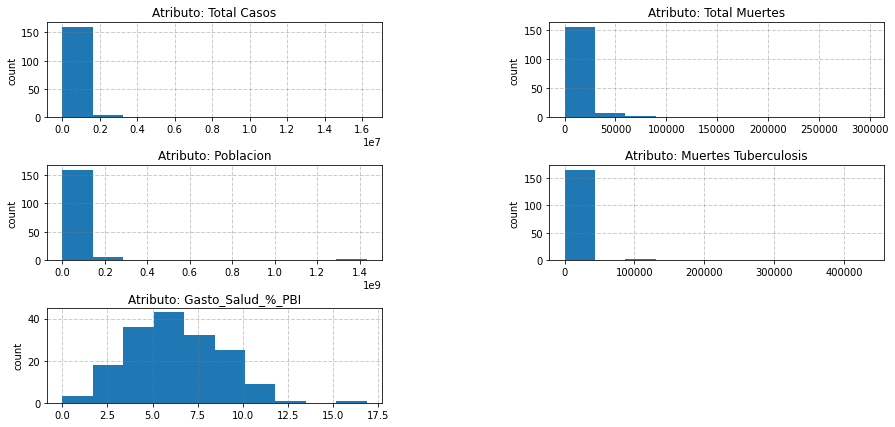

In [31]:
j=1
fig1 = plt.figure("n: i")
fig1.subplots_adjust(hspace=0.5, wspace=0.5)

for i in atributos: 
    atributoi= df[i]
    ax = fig1.add_subplot(3, 2, j)
    ax.hist(atributoi, bins=10)
    ax.set_ylabel("count")
    ax.set_title("Atributo: {}".format(i))
    ax.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
    ax.axhline(0, color='black', linewidth=0.5)
    j+=1
fig1.set_size_inches(15, 7)
plt.show()

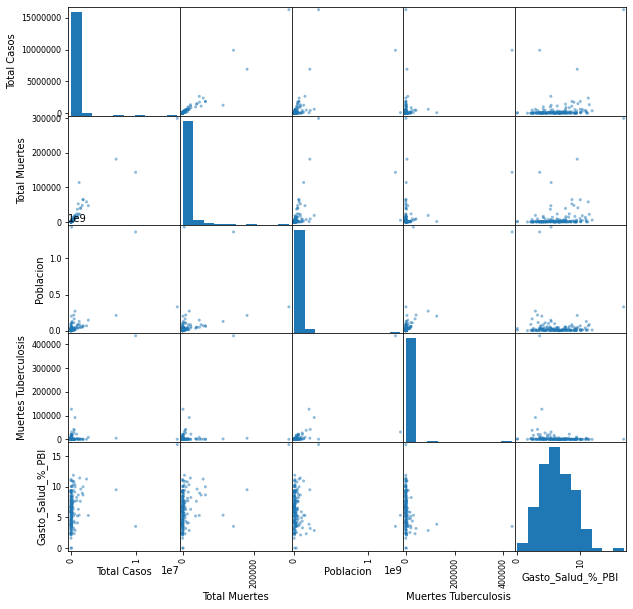

In [44]:
scatter_matrix(df,  figsize=(10, 10))
plt.show()

In [83]:
# Clustering jerarquico

df_jerarquico = df.copy()

#Variable categorica a numerica
ord_enc = OrdinalEncoder()
df_jerarquico["País"] = ord_enc.fit_transform(df_jerarquico[["País"]])
df_jerarquico[["País"]].head(11)

X = df_jerarquico
print(X.head())

   País  Total Casos  ...  Muertes Tuberculosis  Gasto_Salud_%_PBI
0   0.0        49273  ...                  9800               9.40
1   1.0        48530  ...                     8               5.26
2   2.0        92102  ...                  2800               6.22
3   3.0         7338  ...                     0               6.71
4   4.0        16188  ...                 17000               2.55

[5 rows x 6 columns]


In [92]:
# definimos el modelo 
clstr = AgglomerativeClustering(n_clusters=4) 
clstr.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

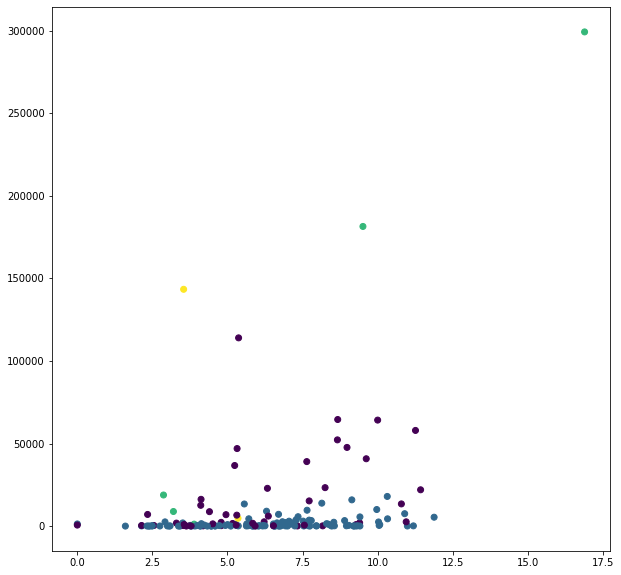

In [93]:
#Graficamos dos variables
plt.figure(figsize=(10,10))
plt.scatter(X["Gasto_Salud_%_PBI"], X["Total Muertes"], c=clstr.fit_predict(X))
plt.show()

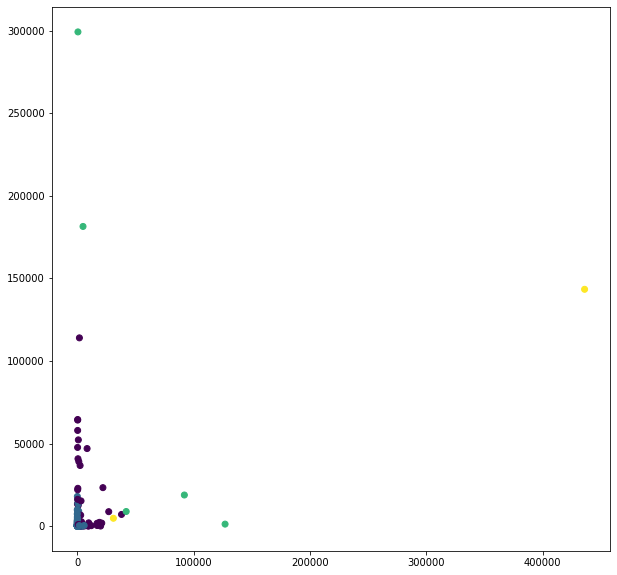

In [94]:
#Graficamos dos variables
plt.figure(figsize=(10,10))
plt.scatter(X["Muertes Tuberculosis"], X["Total Muertes"], c=clstr.fit_predict(X))
plt.show()